# Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# **Lab | Numerical cleaning**

1. Import the necessary libraries.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# To make run all you ask in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#additional libraries
import time
from datetime import time

In [5]:
import scipy.stats as st
import numpy as np

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.


In [8]:
customer_df = pd.read_csv('/Users/deshdeepak/ironhack/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [9]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


3. First look at its main features (head, shape, info).


In [10]:
customer_df.shape

(9134, 24)

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [12]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


4. Rename the columns so they follow the PE8 (snake case).


In [13]:
#checking column names by creating and inspecting the list
col_names = customer_df.columns.tolist()
col_names

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [14]:
#replacing spaces with underscore, and lowering the cases so it's easier to type later
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.columns = customer_df.columns.str.lower()


In [15]:
#checking if the above commands did their job, easy to see in a list so creating a list to view

col_names = customer_df.columns.tolist()
col_names

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

5. Change effective to date column to datetime format.


In [16]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'],errors='coerce')
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

6. Check NaN values per column.


In [17]:
#find null values
customer_df.isnull() #doesnt help much
customer_df.isnull().sum() #quite a lot, so maybe we can see the percentages
customer_df.isnull().sum()/len(customer_df) #checking in % format

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

No null values found, so we don't need to worry about dropping or replacing or predicting any values for now. 

7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.


In [18]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [20]:
#checking value_counts for float dtypes
customer_df['total_claim_amount'].value_counts()
customer_df['customer_lifetime_value'].value_counts()

316.800000     116
292.800000     110
312.000000     108
350.400000     105
331.200000     102
              ... 
480.073548       1
232.674417       1
424.711758       1
1272.546918      1
11.549207        1
Name: total_claim_amount, Length: 5106, dtype: int64

2248.449633     6
10972.067780    6
5619.689084     6
11981.984810    6
2530.705137     6
               ..
12349.702320    1
4046.936065     1
2121.313061     1
7232.609391     1
3297.904615     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [21]:
#checking value_counts for int64 dtypes
customer_df['income'].value_counts()
customer_df['number_of_policies'].value_counts()


0        2317
95697      12
26876       7
61108       7
25965       7
         ... 
36259       1
69011       1
38638       1
30092       1
51199       1
Name: income, Length: 5694, dtype: int64

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

In [22]:
#iterating over a loop to see unique values and their counts for all columns:
for i in range(len(col_names)):
    customer_df[col_names[i]].value_counts()
col_names

ZS22428    1
YV40022    1
DV36320    1
QB14087    1
VY27019    1
          ..
MC20349    1
VZ23007    1
XE22944    1
TC88451    1
VC47959    1
Name: customer, Length: 9134, dtype: int64

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

2248.449633     6
10972.067780    6
5619.689084     6
11981.984810    6
2530.705137     6
               ..
12349.702320    1
4046.936065     1
2121.313061     1
7232.609391     1
3297.904615     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161
2011-02-10    161
2011-01-21    160
2011-01-29    160
2011-01-02    160
2011-02-03    158
2011-02-22    158
2011-02-05    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-01-18    154
2011-02-01    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-25    151
2011-01-07    151
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-02-25    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-02-23    143
2011-01-06    143
2011-01-16    142
2011-02-13    139
2011-02-16    139
2011-02-24    139
2011-02-09    137
2011-01-22    136
2011-02-17    136
2011-02-08    134
2011-02-20

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

0        2317
95697      12
26876       7
61108       7
25965       7
         ... 
36259       1
69011       1
38638       1
30092       1
51199       1
Name: income, Length: 5694, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

65     348
66     307
71     304
73     302
63     289
      ... 
147      1
290      1
273      1
298      1
205      1
Name: monthly_premium_auto, Length: 202, dtype: int64

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64

59    142
61    128
50    125
44    115
10    114
     ... 
16     70
96     67
82     56
98     54
97     52
Name: months_since_policy_inception, Length: 100, dtype: int64

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

316.800000     116
292.800000     110
312.000000     108
350.400000     105
331.200000     102
              ... 
480.073548       1
232.674417       1
424.711758       1
1272.546918      1
11.549207        1
Name: total_claim_amount, Length: 5106, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

**Findings (based on observations from above):**
1. customer:**discrete**, one value for each row as it matches with the shape we found earlier 9134 values for 9134 rows.
2. state: **discrete**, 5 different states.
3. customer_lifetime_value: perhaps **continuos**, we should check it later
4. response: **discrete**, binary: No|Yes
5. coverage: **discrete**, three options: Basic|Extended|Premium
6. education: **discrete**, education level: Bachelor|College|High school or below|Master|Doctor
7. effective_to_date: **discrete** or **continuous**, datetime format can be both discrete or continuous, requires further inspection
8. employment status: **discrete**, options: Employed|Unemployed|Medical Leave|Disabled|Retired
9. gender: **discrete**, binary: F|M
10. income: **continuous**
11. location_code: **discrete**, three options: Suburban|Rural|Urban
12. marital_status: **discrete**, three options: Marital|Single|Divorced
13. monthly_premium_auto: most likely **discrete**, do some further inspection
14. months_since_last_claim: most likely **discrete**, do some further inspection
15. months_since_policy_inception: most likely **discrete**, do some further inspection
16. number_of_open_complaints: **discrete**
17. number_of_policies: **discrete**
18. policy_type: **discrete**, three options: Personal Auto|Corporate Auto|Special Auto
19. policy: **discrete**, 9 options: Personal L1-3|Corporate L1-3|Special L1-3
20. renew_offer_type: **discrete**, 4 options: Offer1-4
21. sales_channel: **discrete**, 4 options: Agent|Branch|Call Center|Web
22. total_claim_amount:**continuous**
23. vehicle_class: **discrete**, 6 options: Four/Two-Door Car|SUV|Sports Car|Luxury SUV/Car
24. vehicle_size: **discrete**, 3 options: Medsize|Small|Large

In [23]:
#from Thom
def function(x):
    if len(x.value_counts()) > 1000:
        return 'Continuous Data'
    else:
        return 'Discrete Data'
X.apply(function)
discrete_df = X.drop(['Customer_Lifetime_Value','Income','Total_Claim_Amount'], axis=1)
discrete_df.head()
continuous_df = X.loc[:,['Customer_Lifetime_Value','Income','Total_Claim_Amount']]
continuous_df.head()

NameError: name 'X' is not defined

In [37]:
#what we need then is:
numericals = pd.DataFrame(customer_df.select_dtypes(np.number))
categoricals = customer_df.select_dtypes(np.object)
numericals.head(2)
categoricals.head(2)

#splitting continuous and discrete variables

continuous = numericals[['customer_lifetime_value','income','monthly_premium_auto','total_claim_amount']]
discrete_num = numericals[['months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
discrete_all = pd.concat([discrete_num,categoricals],axis=1)
#created two discrete variables for now(one for numericals, and other for all discrete variables), because categoricals can be treated as discrete as well. 
continuous.head(2)
discrete_num.head(2)
discrete_all.head(2)

<ipython-input-37-7749ff0ebd20>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,32,5,0,1,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,13,42,0,8,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.


In [32]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [26]:
#i checked value_counts earlier so I am going to just refer to that

#values are okay, but we can make it easier for us by removing 'Auto' from policy_type, and change 'Offer1-4' to '1-4' in renew_offer_type.

#defining functions

def clean_policy(x):
    if 'Personal Auto' in x:
        return "Personal"
    elif 'Corporate Auto' in x:
        return "Corporate"
    else:
        return "Special"

def clean_offer(x):
    if 'Offer1' in x:
        return "1"
    elif 'Offer2' in x:
        return "2"
    elif 'Offer3' in x:
        return "3"
    else:
        return "4"

In [33]:
categoricals['policy_type'] = categoricals['policy_type'].apply(clean_policy)
categoricals['policy_type'].value_counts()

categoricals['renew_offer_type'] = categoricals['renew_offer_type'].apply(clean_offer)
categoricals['renew_offer_type'].value_counts()

<ipython-input-33-a78eb6c3beed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['policy_type'] = categoricals['policy_type'].apply(clean_policy)


Personal     6788
Corporate    1968
Special       378
Name: policy_type, dtype: int64

<ipython-input-33-a78eb6c3beed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['renew_offer_type'] = categoricals['renew_offer_type'].apply(clean_offer)


1    3752
2    2926
3    1432
4    1024
Name: renew_offer_type, dtype: int64

9. Get categorical features.


In [34]:
#our main goal is to predict total_claim_amount so all categorical columns will be features.

#I have already assigned them to categoricals variable.

categoricals.head()


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,Corporate L3,1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,Personal L3,3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,Personal L3,1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,Corporate L2,1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,Personal L1,1,Agent,Four-Door Car,Medsize


10. What should we do with the customer_id column?

In [29]:
#customer_id doesn't exist, but assuming the question means customer column.

customer_df['customer'].unique()
customer_df['customer'].value_counts()

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

ZS22428    1
YV40022    1
DV36320    1
QB14087    1
VY27019    1
          ..
MC20349    1
VZ23007    1
XE22944    1
TC88451    1
VC47959    1
Name: customer, Length: 9134, dtype: int64

In [35]:
#these are most likely license plates of customers for their vehicles.
#this is no different than having customer names in this column
#i would keep it as it is, if we were trying to see individual behavior of the customer

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

However, we are not concerned with individual behavour, for that we could just query them and retrieve what historical data we have on them. For our purposes, it would be prudent to drop this column. 

# **Lab | Cleaning Categorical Data**

1. Import the necessary libraries if you are starting a new notebook.

In [176]:
#done already

2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [40]:
continuous_df = pd.concat([continuous,customer_df['effective_to_date']],axis=1)

discrete_df = pd.concat([discrete_num,categoricals],axis=1) 
#concatenating again so I have cleaned values in columns I have cleaned already

continuous_df.head()
discrete_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,effective_to_date
0,2763.519279,56274,69,384.811147,2011-02-24
1,6979.535903,0,94,1131.464935,2011-01-31
2,12887.431650,48767,108,566.472247,2011-02-19
3,7645.861827,0,106,529.881344,2011-01-20
4,2813.692575,43836,73,138.130879,2011-02-03


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,32,5,0,1,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,13,42,0,8,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,18,38,0,2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,18,65,0,7,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,12,44,0,1,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


3. Plot a correlation matrix, what can you see?

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

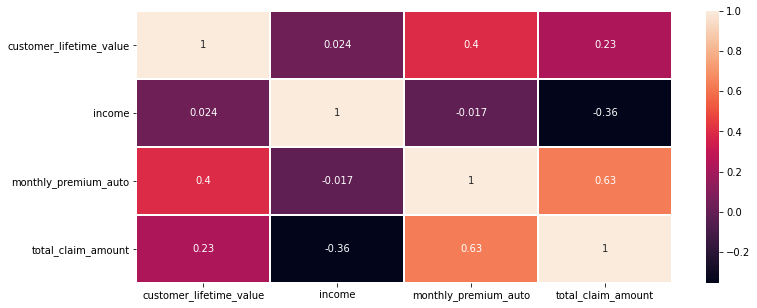

<Figure size 864x360 with 0 Axes>

<AxesSubplot:>

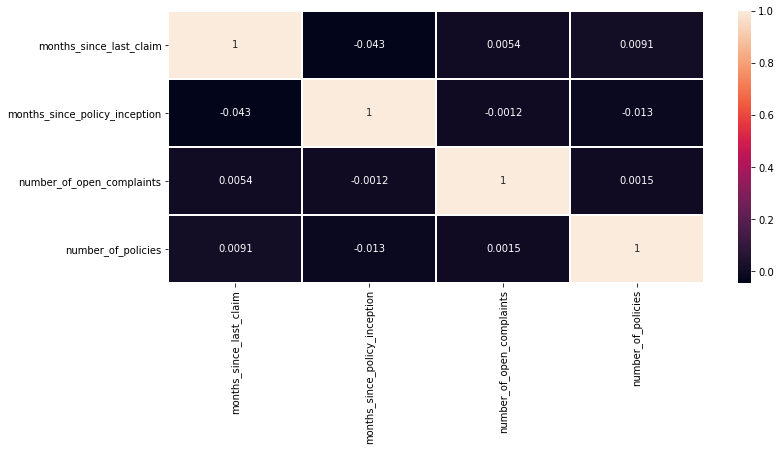

In [41]:
correlation_matrix_c = continuous_df.corr()
#correlation_matrix_c
plt.figure(figsize = (12,5))
sns.heatmap(correlation_matrix_c,annot =True, linewidths =.10, data=continuous_df)
plt.show()

correlation_matrix_d = discrete_df.corr()
#correlation_matrix_d
plt.figure(figsize = (12,5))
sns.heatmap(correlation_matrix_d,annot =True, linewidths =.10, data=discrete_df)
plt.show()

There aren't any variables that are highly correlated to each other. Monthly premium auto seems to be more correlated to total_claim_amount and maybe will be a good predictor for us.

4. Create a function to plot every discrete variables.

In [42]:
%matplotlib inline
col_names_d = discrete_df.columns.tolist()
len(col_names_d)
col_names_d


        

19

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'customer',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

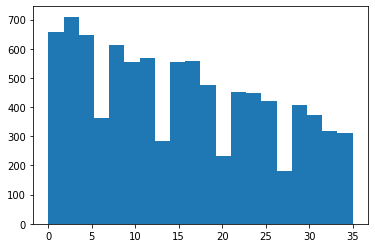

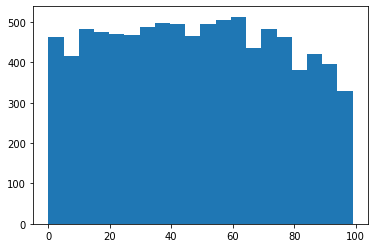

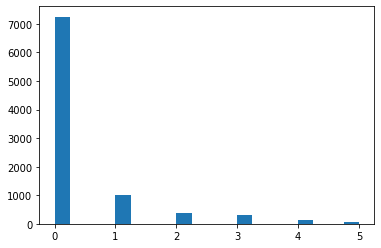

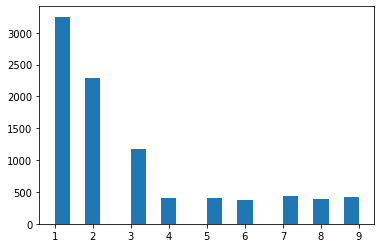

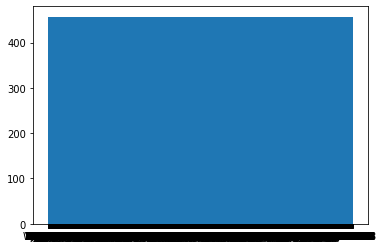

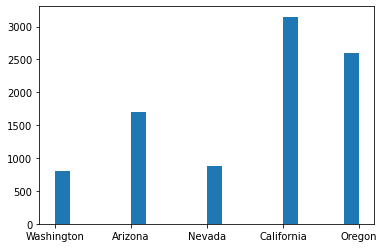

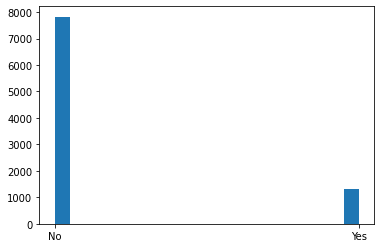

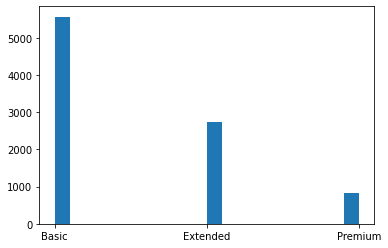

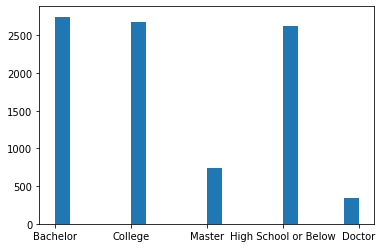

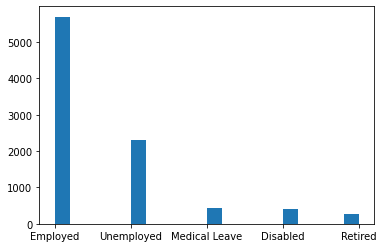

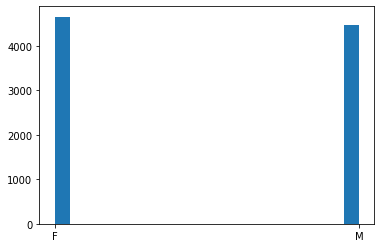

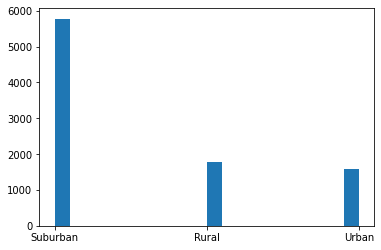

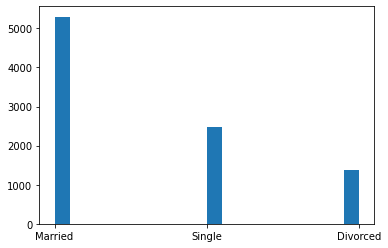

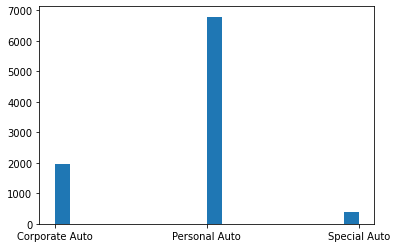

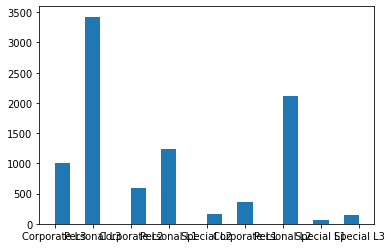

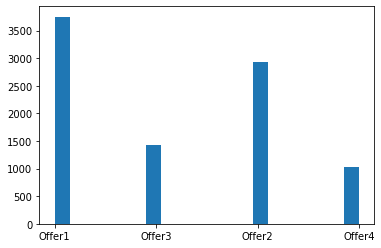

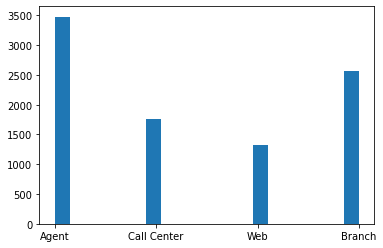

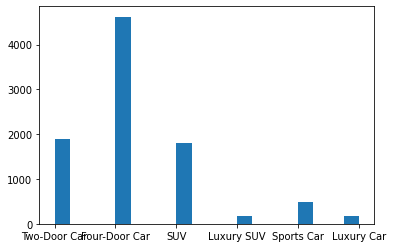

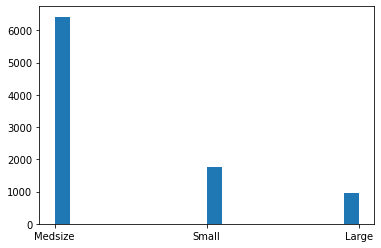

In [43]:
def plot_var(df):
    for i in range(len(col_names_d)):
        plt.hist(df.iloc[:,i],bins=20)
        plt.show()
        #return df.iloc[i]
    #return plt.show()
         
plot_var(discrete_df)


It is more evident from later historgrams how discrete values behave. There are clear gaps between each value that is assigned, and the month values (first two) can be both continuous and discrete depending on the question we are asking so they look more like continuous variables.

Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

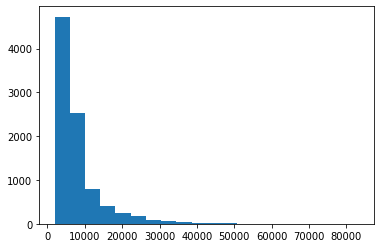

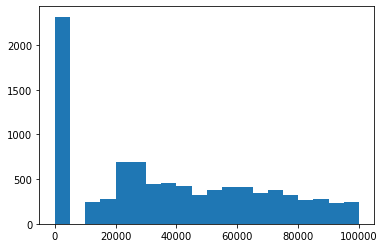

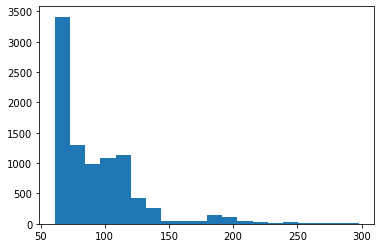

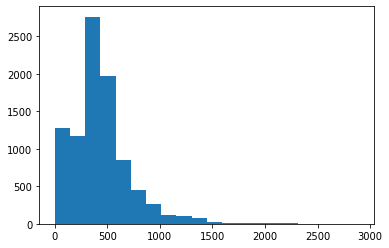

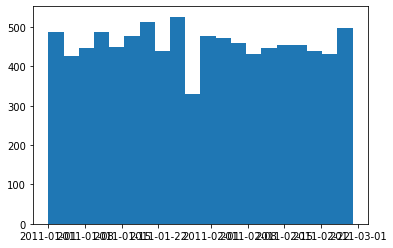

In [45]:
%matplotlib inline

#len(col_names_c)
#col_names_c
def plot_con(df):
    col_names_c = df.columns.tolist()
    for i in range(len(col_names_c)):
        plt.hist(df.iloc[:,i],bins=20)
        plt.show()
        
plot_con(continuous_df)

Histograms are much better for continuous variable!

6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


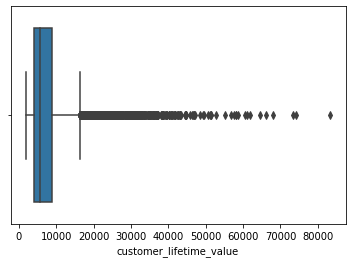

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


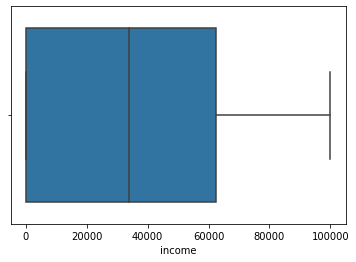

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


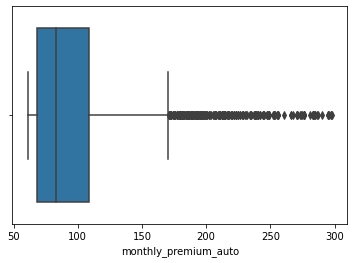

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


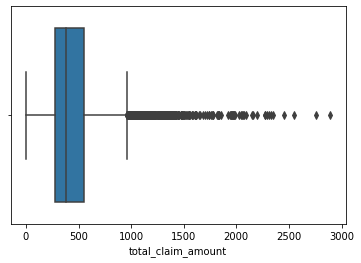

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

In [46]:
def plot_con_box(df):
    col_names_c = df.columns.tolist()
    for i in range(len(col_names_c)):
        sns.boxplot(df.iloc[:,i])
        plt.show()
        
plot_con_box(continuous_df)
#sns.boxplot(discrete_df['Months Since Last Claim'])
#plt.show()

From these boxplots, we can easily see which of the variables most likely has outliers. customer_lifetime_value and total_claim_amount are the prime candidates at this point for which we have to remove outliers. But, the distribution of total_claim_amount looks okay from histogram. We can leave that for now.

7. Have you found outliers? If you have, what should we do with them?

<AxesSubplot:>

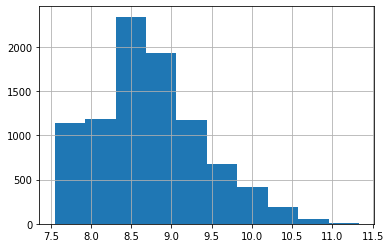

In [47]:
#from above point, I think we should remove the outliers for customer_lifetime_value

#the histogram shows us that there is a heavy skew, we can apply log transformation to make it better.


# We will Log transform the values of the CLV column to reinforce the small 
#values

def log_transfom_clean(row):
    if np.isfinite(row) and row!=0:
        return np.log(row)
    else:
        return row

pd.Series(continuous_df['customer_lifetime_value'].apply(log_transfom_clean)).hist()
plt.show()

Looks much better! 

8. Check nan values per column.

In [49]:
#already done, but doesn't hurt to check for those again as we have been doing some cleaning.

customer_df.isnull().sum() #quite a lot, so maybe we can see the percentages
customer_df.isnull().sum()/len(customer_df) #checking in % format
print("-------")
print("-------")
discrete_df.isnull().sum()/len(discrete_df)
print("-------")
print("-------")
#discrete.isnull().sum()/len(discrete) -- removed this df at some point
#print("-------")
#print("-------")
continuous_df.isnull().sum()/len(continuous_df)

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

-------
-------


months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
customer                         0.0
state                            0.0
response                         0.0
coverage                         0.0
education                        0.0
employmentstatus                 0.0
gender                           0.0
location_code                    0.0
marital_status                   0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

-------
-------


customer_lifetime_value    0.0
income                     0.0
monthly_premium_auto       0.0
total_claim_amount         0.0
effective_to_date          0.0
dtype: float64

Looks all good on all of the dataframes I have :)

# **Lab | Feature Extraction**

1. Open the categoricals variable we created before.

In [50]:
#noticed that I still have no_of_open_complaints as int or numerical, converting it into dtype = object
#do this later
#d = df.convert_dtypes()

In [51]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


2. Plot all the categorical variables with the proper plot. What can you see?

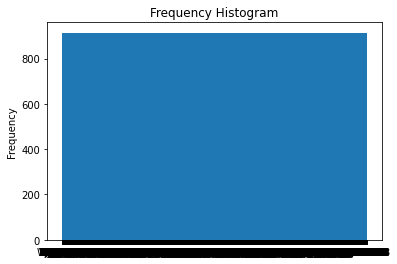

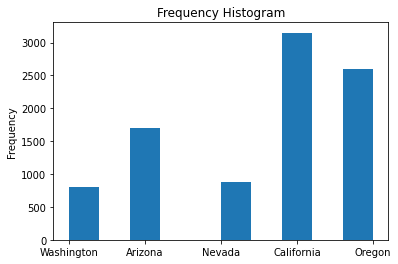

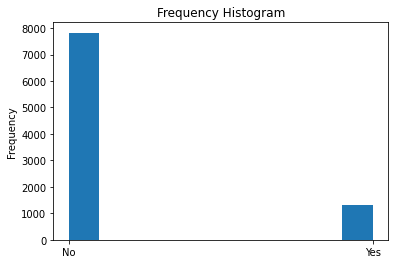

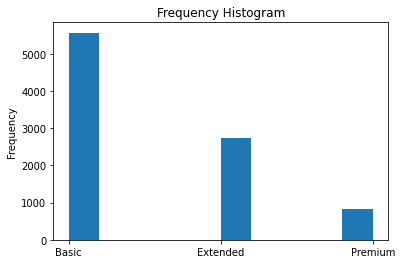

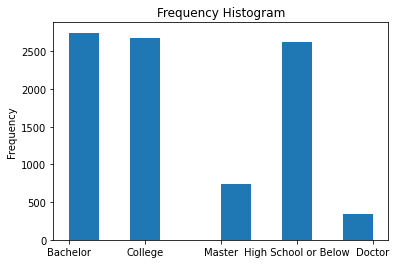

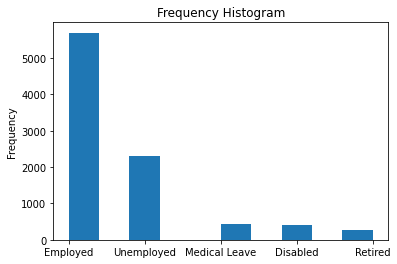

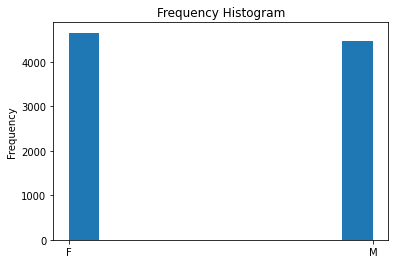

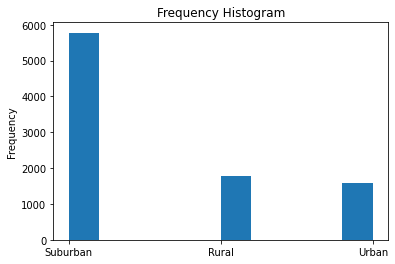

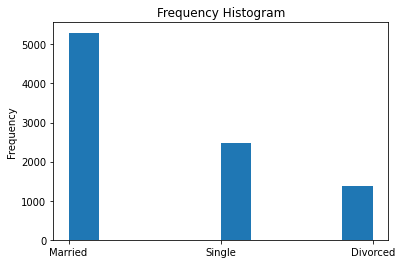

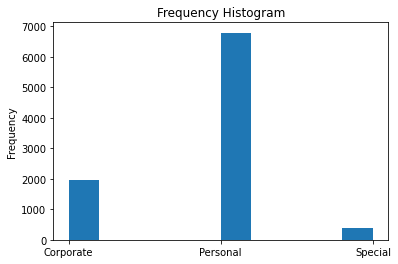

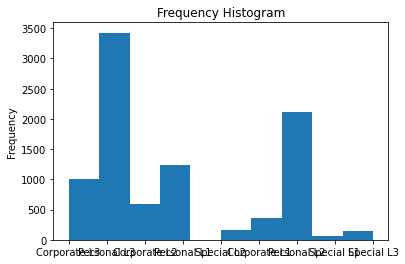

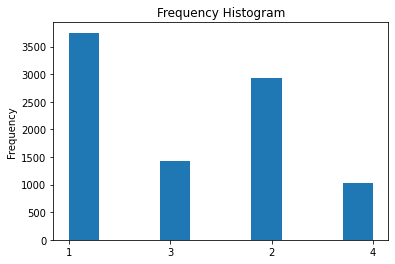

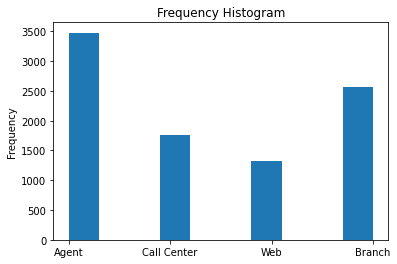

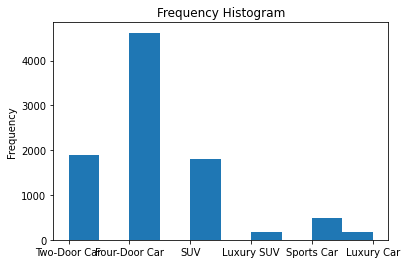

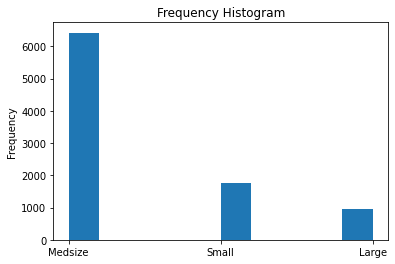

In [187]:
%matplotlib inline

#len(col_names_cat)
#col_names_cat
def plot_cat(df):
    col_names_cat = categoricals.columns.tolist()
    for i in range(len(col_names_cat)):
        plt.hist(df.iloc[:,i])
        plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
        plt.show()
        
plot_cat(categoricals)

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

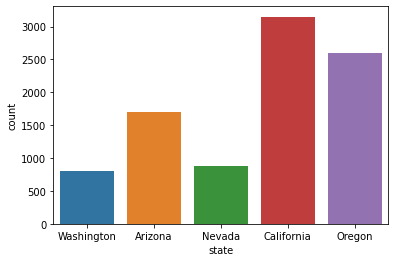

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='response', ylabel='count'>

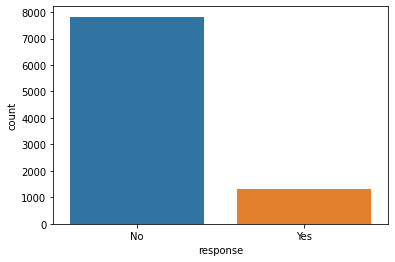

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='coverage', ylabel='count'>

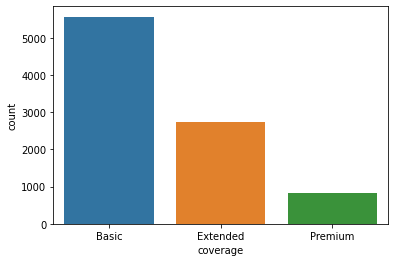

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

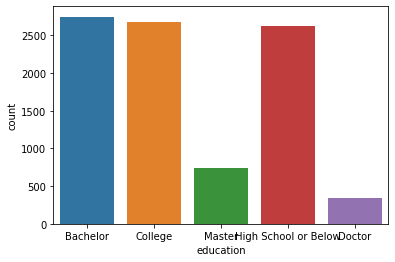

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='employmentstatus', ylabel='count'>

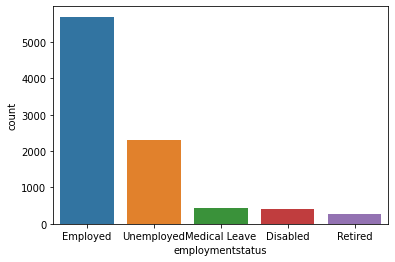

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

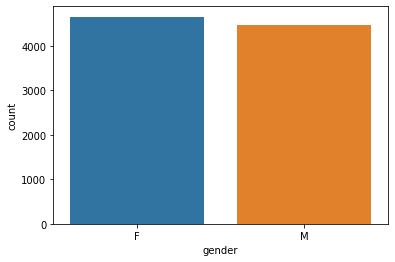

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location_code', ylabel='count'>

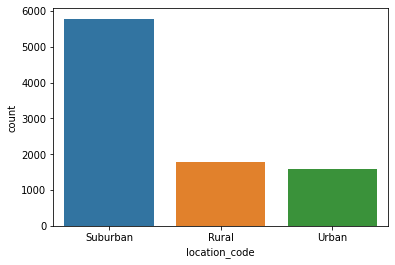

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital_status', ylabel='count'>

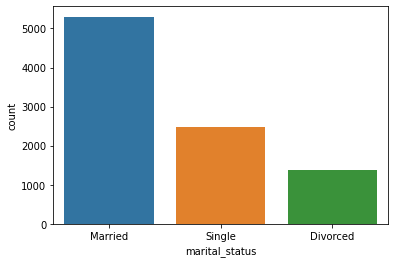

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_type', ylabel='count'>

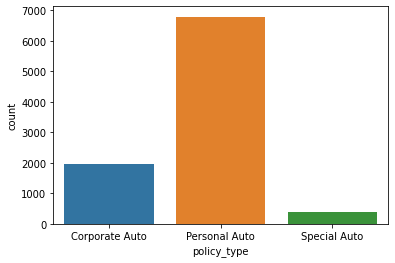

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy', ylabel='count'>

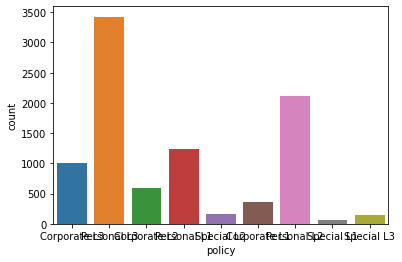

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='renew_offer_type', ylabel='count'>

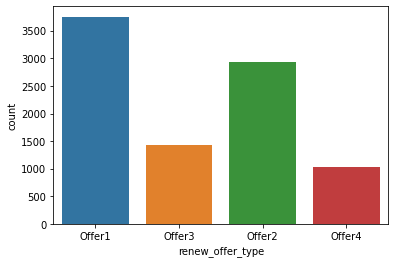

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales_channel', ylabel='count'>

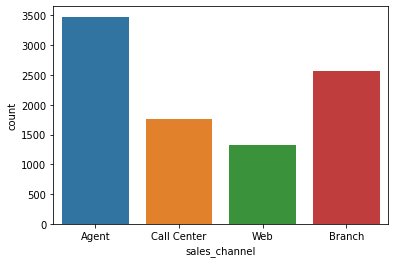

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_class', ylabel='count'>

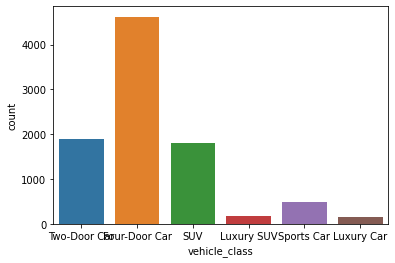

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_size', ylabel='count'>

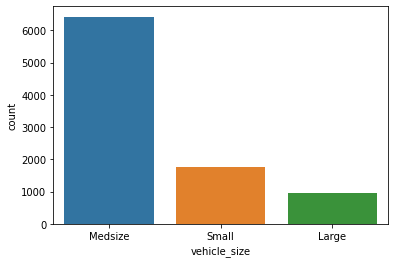

In [53]:
categorical_df = categoricals.drop(['customer'], axis=1) #already dropped the customer so counting it out
for i in range(len(categorical_df.columns)):
        sns.countplot(categorical_df.iloc[:,i])
        plt.show()

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [54]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   policy            9134 non-null   object
 10  renew_offer_type  9134 non-null   object
 11  sales_channel     9134 non-null   object
 12  vehicle_class     9134 non-null   object
 13  vehicle_size      9134 non-null   object
dtypes: object(14)
memory usage: 999.2+ KB


In [55]:
#checking if any of the similar columns are related to each other

#first checking policy_type vs policy
data_crosstab1 = pd.crosstab(categorical_df['policy_type'],categorical_df['policy'],margins=False)
data_crosstab1
#second checking vehicle_class vs vehicle_size
data_crosstab2 = pd.crosstab(categorical_df['vehicle_class'],categorical_df['vehicle_size'],margins=False)
data_crosstab2

#third checking state vs location_code

data_crosstab3 = pd.crosstab(categorical_df['state'],categorical_df['location_code'],margins=False)
data_crosstab3

#fourth checking vehicle_class vs policy_type
data_crosstab4 = pd.crosstab(categorical_df['vehicle_size'],categorical_df['policy_type'],margins=False)
data_crosstab4

#fifth checking employment status vs gender
data_crosstab5= pd.crosstab(categorical_df['employmentstatus'],categorical_df['gender'],margins=False)
data_crosstab5

#sixth checking vehicle_class vs sales_channel
data_crosstab6 = pd.crosstab(categorical_df['vehicle_class'], categorical_df['sales_channel'], margins = False)
data_crosstab6

#7th checking location_code vs education
data_crosstab7 = pd.crosstab(categorical_df['location_code'], categorical_df['education'], margins = False)
data_crosstab7

#9th checking renew_offer_type vs response
data_crosstab8 = pd.crosstab(categoricals['renew_offer_type'], categoricals['response'], margins = False)
data_crosstab8



policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


vehicle_size,Large,Medsize,Small
vehicle_class,,,
Four-Door Car,475,3237,909
Luxury Car,16,106,41
Luxury SUV,18,125,41
SUV,167,1308,321
Sports Car,49,366,69
Two-Door Car,221,1282,383


location_code,Rural,Suburban,Urban
state,,,
Arizona,325,1080,298
California,604,1997,549
Nevada,180,550,152
Oregon,513,1640,448
Washington,151,512,135


policy_type,Corporate Auto,Personal Auto,Special Auto
vehicle_size,,,
Large,198,712,36
Medsize,1396,4766,262
Small,374,1310,80


gender,F,M
employmentstatus,,
Disabled,244,161
Employed,2937,2761
Medical Leave,214,218
Retired,128,154
Unemployed,1135,1182


sales_channel,Agent,Branch,Call Center,Web
vehicle_class,,,,
Four-Door Car,1777,1271,877,696
Luxury Car,47,57,34,25
Luxury SUV,89,38,25,32
SUV,684,506,368,238
Sports Car,192,136,77,79
Two-Door Car,688,559,384,255


education,Bachelor,College,Doctor,High School or Below,Master
location_code,,,,,
Rural,542,524,102,368,237
Suburban,1704,1683,157,1917,318
Urban,502,474,83,337,186


response,No,Yes
renew_offer_type,,
Offer1,3158,594
Offer2,2242,684
Offer3,1402,30
Offer4,1024,0


In [56]:
#now running chi2_contingency to find dependence and independence

st.chi2_contingency(data_crosstab1)
print("------")
#p-value < 0.05, they are dependent. Reject. We could drop them.
st.chi2_contingency(data_crosstab2)
print("------")
#p-value < 0.05, they are dependent. Reject. We could drop them.
st.chi2_contingency(data_crosstab3)
print("------")
#p-value > 0.05, they are independent. Accept. We need to keep these.
st.chi2_contingency(data_crosstab4)
print("------")
#p-value > 0.05, they are independent. Accept. We need to keep these.
st.chi2_contingency(data_crosstab5)
print("------")
#p-value < 0.05, they are dependent. Reject. We could drop them.
st.chi2_contingency(data_crosstab6)
print("------")
#p-value < 0.05, they are dependent. Reject. We could drop them.
st.chi2_contingency(data_crosstab7)
print("------")
#p-value < 0.05, they are dependent. Reject. We could drop them.
st.chi2_contingency(data_crosstab8)
print("------")
#p-value < 0.05, they are dependent. Reject. We could drop them.

(18268.0,
 0.0,
 16,
 array([[  77.3496825 ,  128.19794176,  218.4751478 ,  267.16881979,
          457.20341581,  738.16159404,   14.22027589,   35.33523101,
           31.88789139],
        [ 266.79351872,  442.17867309,  753.56163784,  921.51521787,
         1576.98007445, 2546.05736808,   49.04839063,  121.87781914,
          109.9873002 ],
        [  14.85679877,   24.62338515,   41.96321436,   51.31596234,
           87.81650974,  141.78103788,    2.73133348,    6.78694986,
            6.12480841]]))

------


(24.66171915875752,
 0.006024951458906972,
 10,
 array([[ 478.59273046, 3249.97854171,  892.42872783],
        [  16.88176046,  114.63893146,   31.47930808],
        [  19.05671119,  129.40836435,   35.53492446],
        [ 186.01007226, 1263.1381651 ,  346.85176265],
        [  50.12743595,  340.40026275,   93.47230129],
        [ 195.33128969, 1326.43573462,  364.2329757 ]]))

------


(1.2593534036339677,
 0.9960201469631593,
 8,
 array([[ 330.56919203, 1077.4728487 ,  294.95795927],
        [ 611.4462448 , 1992.97679002,  545.57696519],
        [ 171.20494854,  558.0335012 ,  152.76155025],
        [ 504.87989928, 1645.62940661,  450.49069411],
        [ 154.89971535,  504.88745347,  138.21283118]]))

------


(1.4743327070960306,
 0.8311781720864471,
 4,
 array([[ 203.82395446,  703.02693234,   39.1491132 ],
        [1384.10685351, 4774.0433545 ,  265.84979199],
        [ 380.06919203, 1310.92971316,   73.00109481]]))

------


(22.21612793202471,
 0.00018151136449675047,
 4,
 array([[ 206.53492446,  198.46507554],
        [2905.76790015, 2792.23209985],
        [ 220.30391942,  211.69608058],
        [ 143.80950296,  138.19049704],
        [1181.58375301, 1135.41624699]]))

------


(34.36294838827863,
 0.0030274172690931,
 15,
 array([[1759.05594482, 1298.67604554,  892.93463981,  670.33336983],
        [  62.04850011,   45.80917451,   31.49715349,   23.64517189],
        [  70.04247865,   51.71097   ,   35.55506897,   26.69148237],
        [ 683.67549814,  504.74403328,  347.04839063,  260.53207795],
        [ 184.2421721 ,  136.02233414,   93.52529012,   70.21020363],
        [ 717.93540617,  530.03744252,  364.43945697,  273.58769433]]))

------


(291.6886097946548,
 2.4160389458833635e-58,
 8,
 array([[ 533.41405737,  520.4086928 ,   66.38559229,  508.95620758,
          143.83544997],
        [1738.63499015, 1696.24469017,  216.3803372 , 1658.91591855,
          468.82406394],
        [ 475.95095249,  464.34661704,   59.23407051,  454.12787388,
          128.3404861 ]]))

------


(548.1644514293835,
 1.73695030654266e-118,
 3,
 array([[3214.70899934,  537.29100066],
        [2506.99321217,  419.00678783],
        [1226.9358441 ,  205.0641559 ],
        [ 877.36194438,  146.63805562]]))

------


In [57]:
for i in range(len(categorical_df.columns)-1):
    for j in range(len(categorical_df.columns)):
        cross = pd.crosstab(categorical_df[categorical_df.columns[i]], categorical_df[categorical_df.columns[j]], margins = False)
        P =st.chi2_contingency(cross)
        print(categorical_df.columns[i], 'Vs', categorical_df.columns[j],'P-Value=',P[1])

state Vs state P-Value= 0.0
state Vs response P-Value= 0.9792071512335693
state Vs coverage P-Value= 0.917159533694559
state Vs education P-Value= 0.41175093304338845
state Vs employmentstatus P-Value= 0.9967283699758681
state Vs gender P-Value= 0.8788800177920362
state Vs location_code P-Value= 0.9960201469631593
state Vs marital_status P-Value= 0.3071184165859179
state Vs policy_type P-Value= 0.02759771453682972
state Vs policy P-Value= 0.0002717396766205771
state Vs renew_offer_type P-Value= 0.9981046105700003
state Vs sales_channel P-Value= 0.7518231475699538
state Vs vehicle_class P-Value= 0.47283732040742543
state Vs vehicle_size P-Value= 0.28300211552440135
response Vs state P-Value= 0.9792071512335693
response Vs response P-Value= 0.0
response Vs coverage P-Value= 0.969826323902391
response Vs education P-Value= 0.026815866387951
response Vs employmentstatus P-Value= 8.020582120764498e-183
response Vs gender P-Value= 0.6963314758009403
response Vs location_code P-Value= 6.73511

sales_channel Vs coverage P-Value= 0.020110277243845478
sales_channel Vs education P-Value= 0.0011435821325345716
sales_channel Vs employmentstatus P-Value= 5.45395718470151e-07
sales_channel Vs gender P-Value= 0.15164502447663514
sales_channel Vs location_code P-Value= 0.8686591164471097
sales_channel Vs marital_status P-Value= 0.1096558891225557
sales_channel Vs policy_type P-Value= 0.5887070133364456
sales_channel Vs policy P-Value= 0.7196886503242799
sales_channel Vs renew_offer_type P-Value= 2.695651366787274e-46
sales_channel Vs sales_channel P-Value= 0.0
sales_channel Vs vehicle_class P-Value= 0.003027417269093112
sales_channel Vs vehicle_size P-Value= 0.25404227243355365
vehicle_class Vs state P-Value= 0.4728373204074251
vehicle_class Vs response P-Value= 0.0007392131130991753
vehicle_class Vs coverage P-Value= 0.04997786810554786
vehicle_class Vs education P-Value= 0.023607445029071007
vehicle_class Vs employmentstatus P-Value= 0.10148778782649487
vehicle_class Vs gender P-Val

4. Plot time variable. Can you extract something from it?

In [58]:
time = customer_df['effective_to_date']

<Figure size 864x360 with 0 Axes>

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

Text(0.5, 1.0, 'Total Claim Amount vs Effective To Date')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Total Claim Amount')

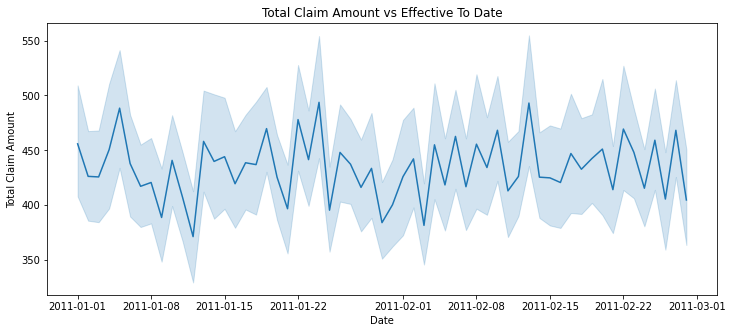

In [59]:
plt.figure(figsize = (12,5))
sns.lineplot('effective_to_date','total_claim_amount', data=customer_df)
plt.title("Total Claim Amount vs Effective To Date")
plt.xlabel("Date")
plt.ylabel("Total Claim Amount")
plt.show()

# **Lab | Data cleaning and wrangling**

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


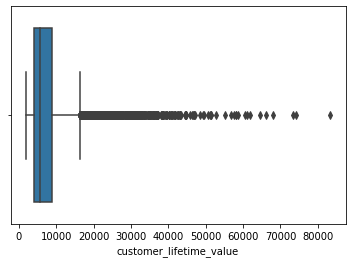

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


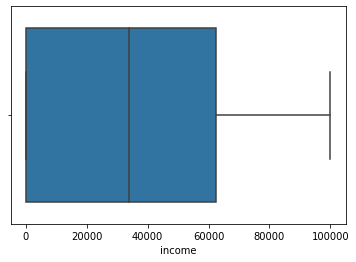

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


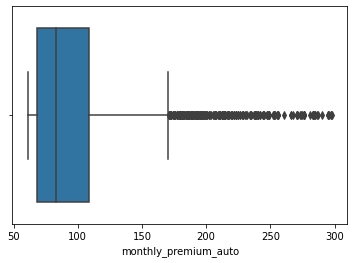

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


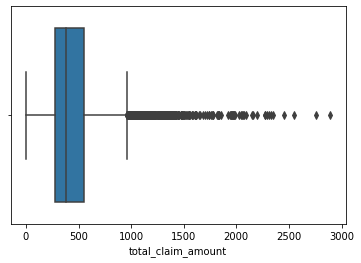

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

In [60]:
plot_con_box(continuous_df)

In [61]:
#removing outliers

#creating a new variable continuous1 because I don't want to drop outliers just because they are there

#these outliers are probably not errors, so I will keep continuous_df as it is, later I will check for both cases

continuous1 = continuous_df.drop(['total_claim_amount','income'],axis=1)
continuous1['customer_lifetime_value']=pd.Series(continuous_df['customer_lifetime_value'].apply(log_transfom_clean))
continuous1['monthly_premium_auto']=pd.Series(continuous_df['monthly_premium_auto'].apply(log_transfom_clean))
                                                 
        
def remove_outlier(df):
    col_names_co = df.columns.tolist()
    for i in range(len(col_names_co)):

        iqr = np.percentile(df.iloc[:,i],75) - np.percentile(df.iloc[:,i],25)
        #iqr = np.percentile(df.['income'],75) - np.percentile(df.['income'],25)
        upper_limit = np.percentile(df.iloc[:,i],75) + 1.5*iqr
        
        extraordinary_points = df[df.iloc[:,i]>upper_limit]
        #len(extraordinary_points)
        df=df[df.iloc[:,i]<upper_limit]
        return df
       
    

In [62]:
remove_outlier(continuous1)
continuous_df

,customer_lifetime_value,monthly_premium_auto,effective_to_date
0,7.924260,4.234107,2011-02-24
1,8.850738,4.543295,2011-01-31
2,9.464008,4.682131,2011-02-19
3,8.941920,4.663439,2011-01-20
4,7.942253,4.290459,2011-02-03
...,...,...,...
9129,10.060747,4.290459,2011-02-10
9130,8.038031,4.369448,2011-02-12
9131,9.007476,4.442651,2011-02-06
9132,8.925912,4.564348,2011-02-03


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,effective_to_date
0,2763.519279,56274,69,384.811147,2011-02-24
1,6979.535903,0,94,1131.464935,2011-01-31
2,12887.431650,48767,108,566.472247,2011-02-19
3,7645.861827,0,106,529.881344,2011-01-20
4,2813.692575,43836,73,138.130879,2011-02-03
...,...,...,...,...,...
9129,23405.987980,71941,73,198.234764,2011-02-10
9130,3096.511217,21604,79,379.200000,2011-02-12
9131,8163.890428,0,85,790.784983,2011-02-06
9132,7524.442436,21941,96,691.200000,2011-02-03


In [68]:
#plot_con_box(continuous1)
#plt.boxplot(continuous1)
#plt.show()

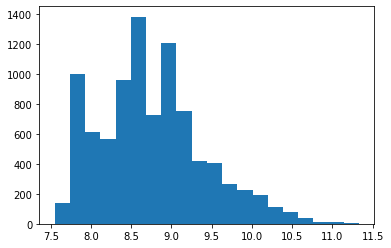

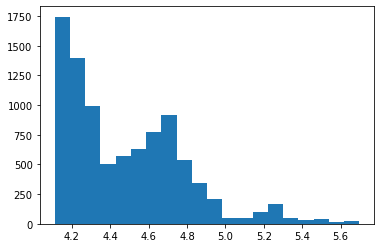

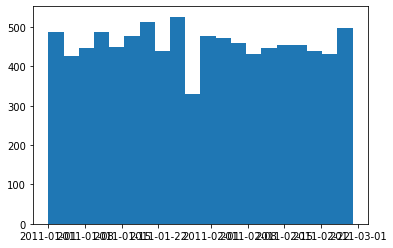

In [69]:
plot_con(continuous1)

Looks much better than before!

2. Create a copy of the dataframe for the data wrangling.

In [70]:
#creating a copy of dataframe
customer_df_cleaned = pd.concat([continuous1,discrete_df],axis=1)

#note I am concatenating with continuous_df
customer_df_cleaned.head()
customer_df_cleaned.sample(20)
customer_df_cleaned.info()
customer_df_cleaned['monthly_premium_auto'].isna().value_counts() #checking if there are any null values after concatenating

#dropping redundant columns or the ones that don't interest us
customer_data = customer_df_cleaned.drop(['policy','vehicle_class','number_of_open_complaints'],axis=1)
customer_data





,customer_lifetime_value,monthly_premium_auto,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,7.924260,4.234107,2011-02-24,32,5,0,1,BU79786,Washington,No,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,8.850738,4.543295,2011-01-31,13,42,0,8,QZ44356,Arizona,No,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,9.464008,4.682131,2011-02-19,18,38,0,2,AI49188,Nevada,No,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,8.941920,4.663439,2011-01-20,18,65,0,7,WW63253,California,No,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,7.942253,4.290459,2011-02-03,12,44,0,1,HB64268,Washington,No,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


,customer_lifetime_value,monthly_premium_auto,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
5849,8.980999,4.595120,2011-01-25,2,11,0,3,IF18508,California,No,...,Employed,F,Rural,Single,Personal Auto,Personal L1,Offer4,Agent,Four-Door Car,Large
8390,7.795389,4.110874,2011-01-17,21,57,0,1,AF20716,Oregon,No,...,Employed,M,Rural,Married,Personal Auto,Personal L3,Offer2,Agent,Two-Door Car,Medsize
3630,8.631816,4.248495,2011-02-25,32,17,0,5,SF11920,Arizona,No,...,Employed,F,Urban,Married,Corporate Auto,Corporate L1,Offer1,Web,Two-Door Car,Medsize
5499,8.708982,4.418841,2011-02-14,13,62,0,9,HS79851,Oregon,Yes,...,Retired,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Two-Door Car,Medsize
6152,9.108935,4.727388,2011-01-21,20,44,0,9,BL89983,California,Yes,...,Employed,F,Suburban,Married,Special Auto,Special L3,Offer2,Web,Four-Door Car,Large
1451,7.760077,4.234107,2011-02-22,1,56,0,1,XR97812,California,No,...,Unemployed,M,Suburban,Single,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
8270,8.561259,4.174387,2011-02-24,24,0,0,9,OV29928,Washington,No,...,Employed,F,Urban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
5897,8.816769,4.430817,2011-02-26,11,32,0,6,AP52565,Arizona,No,...,Employed,F,Urban,Married,Corporate Auto,Corporate L1,Offer4,Branch,Four-Door Car,Medsize
4509,9.289879,4.897840,2011-02-28,3,89,0,5,LT16517,Oregon,No,...,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer1,Web,SUV,Medsize
1505,8.095738,4.406719,2011-02-02,1,33,0,1,WT71621,Washington,No,...,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Web,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_lifetime_value        9134 non-null   float64       
 1   monthly_premium_auto           9134 non-null   float64       
 2   effective_to_date              9134 non-null   datetime64[ns]
 3   months_since_last_claim        9134 non-null   int64         
 4   months_since_policy_inception  9134 non-null   int64         
 5   number_of_open_complaints      9134 non-null   int64         
 6   number_of_policies             9134 non-null   int64         
 7   customer                       9134 non-null   object        
 8   state                          9134 non-null   object        
 9   response                       9134 non-null   object        
 10  coverage                       9134 non-null   object        
 11  education        

False    9134
Name: monthly_premium_auto, dtype: int64

,customer_lifetime_value,monthly_premium_auto,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_policies,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_size
0,7.924260,4.234107,2011-02-24,32,5,1,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Medsize
1,8.850738,4.543295,2011-01-31,13,42,8,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Medsize
2,9.464008,4.682131,2011-02-19,18,38,2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Medsize
3,8.941920,4.663439,2011-01-20,18,65,7,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,Medsize
4,7.942253,4.290459,2011-02-03,12,44,1,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,10.060747,4.290459,2011-02-10,18,89,2,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Medsize
9130,8.038031,4.369448,2011-02-12,14,28,1,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Medsize
9131,9.007476,4.442651,2011-02-06,9,37,2,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Medsize
9132,8.925912,4.564348,2011-02-03,34,3,3,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Large


In [71]:
#now doing the X-y split
X=customer_data.drop(['customer'],axis=1)
y=continuous_df[['total_claim_amount']]
X.info()
y.info()

#checking if the split worked properly



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_lifetime_value        9134 non-null   float64       
 1   monthly_premium_auto           9134 non-null   float64       
 2   effective_to_date              9134 non-null   datetime64[ns]
 3   months_since_last_claim        9134 non-null   int64         
 4   months_since_policy_inception  9134 non-null   int64         
 5   number_of_policies             9134 non-null   int64         
 6   state                          9134 non-null   object        
 7   response                       9134 non-null   object        
 8   coverage                       9134 non-null   object        
 9   education                      9134 non-null   object        
 10  employmentstatus               9134 non-null   object        
 11  gender           

moved it here from the last lab to here:
1. Import sklearn train_test_split and separate the data.

In [72]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)


3. Normalize the continuous variables. You can use any one method you want.

In [118]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
3715,9.106747,4.867534,32,38,4
3824,9.177063,4.564348,5,27,2
4708,9.111820,4.744932,8,44,3
8734,9.614474,5.402677,26,50,8
6094,9.015449,4.691348,5,63,3


In [119]:
#preprocessing the data

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals_train) #this line teaches standardscaler where points are, subtracting mean to it, and dividing by standard deviation
numericals_train_standardized = transformer.transform(numericals_train) #this line transforms based on what it learned in the previous line
numericals_test_standardized = transformer.transform(numericals_test) 
numericals_test_standardized

array([[-0.3215573 , -1.00028301, -1.10934383,  1.45336585,  1.26868097],
       [-0.39230259,  1.04315164, -1.20907649, -1.28911217, -0.82238367],
       [-0.21252535, -0.85572189, -0.41121522,  1.27293967,  2.52331976],
       ...,
       [ 0.5139151 ,  0.68526383,  0.88530934,  1.45336585,  0.01404219],
       [-0.63146951,  0.65600432,  1.18450731,  1.45336585, -0.82238367],
       [-0.43093537, -0.85572189, -0.61068054, -1.68604978,  1.26868097]])

4. Encode the categorical variables

In [120]:
#now encoding the categorical variables

categoricals_train= X_train.select_dtypes(np.object)
categoricals_test= X_test.select_dtypes(np.object)
categoricals_train.head()

<ipython-input-120-4aceaaae8cee>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals_train= X_train.select_dtypes(np.object)
<ipython-input-120-4aceaaae8cee>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals_test= X_test.select_dtypes(np.object)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_size
3715,Arizona,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Agent,Small
3824,Oregon,No,Extended,High School or Below,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Agent,Medsize
4708,Oregon,No,Basic,College,Employed,M,Rural,Married,Personal Auto,Offer1,Agent,Medsize
8734,California,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer1,Branch,Medsize
6094,Oregon,No,Basic,Master,Unemployed,F,Urban,Married,Personal Auto,Offer3,Web,Medsize


In [77]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train) #drop=first, drops one of the values so we don't have redundant
categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

In [78]:
categoricals_train_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [121]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5480 entries, 3715 to 5640
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_lifetime_value        5480 non-null   float64       
 1   monthly_premium_auto           5480 non-null   float64       
 2   effective_to_date              5480 non-null   datetime64[ns]
 3   months_since_last_claim        5480 non-null   int64         
 4   months_since_policy_inception  5480 non-null   int64         
 5   number_of_policies             5480 non-null   int64         
 6   state                          5480 non-null   object        
 7   response                       5480 non-null   object        
 8   coverage                       5480 non-null   object        
 9   education                      5480 non-null   object        
 10  employmentstatus               5480 non-null   object        
 11  gender        

In [122]:
X_train['year'] = X_train['effective_to_date'].dt.year
X_test['year'] = X_test['effective_to_date'].dt.year
   

X_train['month'] = X_train['effective_to_date'].dt.month
X_test['month'] = X_test['effective_to_date'].dt.month

X_train['day'] = X_train['effective_to_date'].dt.day
X_test['day'] = X_test['effective_to_date'].dt.day

X_train = X_train.drop(['effective_to_date'],axis=1)
X_test = X_test.drop(['effective_to_date'],axis=1)
X_test.head(5)
X_train.head(5)
#data['month'] = data['date'].dt.month

<ipython-input-122-2947f19a4df3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['year'] = X_train['effective_to_date'].dt.year
<ipython-input-122-2947f19a4df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['year'] = X_test['effective_to_date'].dt.year
<ipython-input-122-2947f19a4df3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_size,year,month,day
7175,8.539458,4.174387,4,88,6,Oregon,No,Basic,Bachelor,Employed,M,Suburban,Divorced,Personal Auto,Offer1,Web,Medsize,2011,1,14
7255,8.493369,4.812184,3,12,1,Nevada,No,Extended,High School or Below,Employed,F,Rural,Married,Personal Auto,Offer2,Call Center,Medsize,2011,2,10
2846,8.610489,4.219508,11,83,9,California,No,Basic,High School or Below,Employed,F,Rural,Married,Personal Auto,Offer2,Web,Large,2011,2,17
1211,8.216192,4.564348,6,5,1,California,No,Extended,College,Retired,F,Suburban,Married,Personal Auto,Offer4,Web,Medsize,2011,2,17
4294,9.068758,4.691348,5,60,8,Oregon,No,Premium,Bachelor,Employed,F,Rural,Married,Corporate Auto,Offer3,Agent,Medsize,2011,1,4


,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_size,year,month,day
3715,9.106747,4.867534,32,38,4,Arizona,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Agent,Small,2011,1,23
3824,9.177063,4.564348,5,27,2,Oregon,No,Extended,High School or Below,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Agent,Medsize,2011,2,23
4708,9.111820,4.744932,8,44,3,Oregon,No,Basic,College,Employed,M,Rural,Married,Personal Auto,Offer1,Agent,Medsize,2011,1,19
8734,9.614474,5.402677,26,50,8,California,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer1,Branch,Medsize,2011,1,8
6094,9.015449,4.691348,5,63,3,Oregon,No,Basic,Master,Unemployed,F,Urban,Married,Personal Auto,Offer3,Web,Medsize,2011,1,14


In [123]:
#dropping effective_to_date as I have months and days now

date_train = X_train[['month','year','day']]
date_test = X_test[['month','year','day']]
date_train.head()

,month,year,day
3715,1,2011,23
3824,2,2011,23
4708,1,2011,19
8734,1,2011,8
6094,1,2011,14


In [124]:
transformer = StandardScaler().fit(date_train) #this line teaches standardscaler where points are, subtracting mean to it, and dividing by standard deviation
date_train_standardized = transformer.transform(date_train) #this line transforms based on what it learned in the previous line
date_test_standardized = transformer.transform(date_test) 
date_test_standardized

array([[-0.91997891,  0.        , -0.16294437],
       [ 1.08698145,  0.        , -0.62801476],
       [ 1.08698145,  0.        ,  0.18585842],
       ...,
       [ 1.08698145,  0.        ,  1.1159992 ],
       [-0.91997891,  0.        , -0.27921197],
       [ 1.08698145,  0.        ,  0.9997316 ]])

6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [109]:
#X_train.info()
#X_test.info()

In [125]:
X_train = np.concatenate((numericals_train_standardized,date_train_standardized,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_standardized,date_test_standardized,categoricals_test_encoded),axis=1)

In [126]:
X_train

array([[ 0.54922331,  1.22048752,  1.6831706 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.65715781,  0.24911069, -1.00961117, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.55701004,  0.8276826 , -0.7104132 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.18790801, -0.6284    ,  1.08477465, ...,  1.        ,
         0.        ,  1.        ],
       [-0.66684097,  0.59667124,  1.58343794, ...,  0.        ,
         0.        ,  0.        ],
       [-0.62408459,  0.5665875 , -0.21174991, ...,  0.        ,
         1.        ,  0.        ]])

# **Lab | Comparing regression models**


1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [127]:
from sklearn.neighbors import KNeighborsRegressor #regressor instead of classifier because total_claim_amount prediction is more suited to Regression than classiffication

KNN = KNeighborsRegressor(n_neighbors=7)
KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [111]:
#score decreased by .01% more or less in this iteration when I added time variables
#i haven't dropped effective to date, so it could be because of that.

score = KNN.score(X_test, y_test)
#score

0.634360377796044

In [128]:
#this score is after dropping effective to date, no difference actually. 
#probably it was something else in my previous iteration
score = KNN.score(X_test, y_test)
score

0.634360377796044

In [129]:
scores = []
for k in range(2,14):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

scores

KNeighborsRegressor(n_neighbors=2)

KNeighborsRegressor(n_neighbors=3)

KNeighborsRegressor(n_neighbors=4)

KNeighborsRegressor()

KNeighborsRegressor(n_neighbors=6)

KNeighborsRegressor(n_neighbors=7)

KNeighborsRegressor(n_neighbors=8)

KNeighborsRegressor(n_neighbors=9)

KNeighborsRegressor(n_neighbors=10)

KNeighborsRegressor(n_neighbors=11)

KNeighborsRegressor(n_neighbors=12)

KNeighborsRegressor(n_neighbors=13)

[0.5284238846360404,
 0.5894390215341827,
 0.6074345839263877,
 0.6221343537355064,
 0.6286681532826759,
 0.634360377796044,
 0.6357375823581737,
 0.6369370071676219,
 0.6395873350339993,
 0.6363383603992303,
 0.6392022367969455,
 0.6382768950924527]

<Figure size 720x1080 with 0 Axes>

Text(0.5, 1.0, 'accuracy scores vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Accuracy')

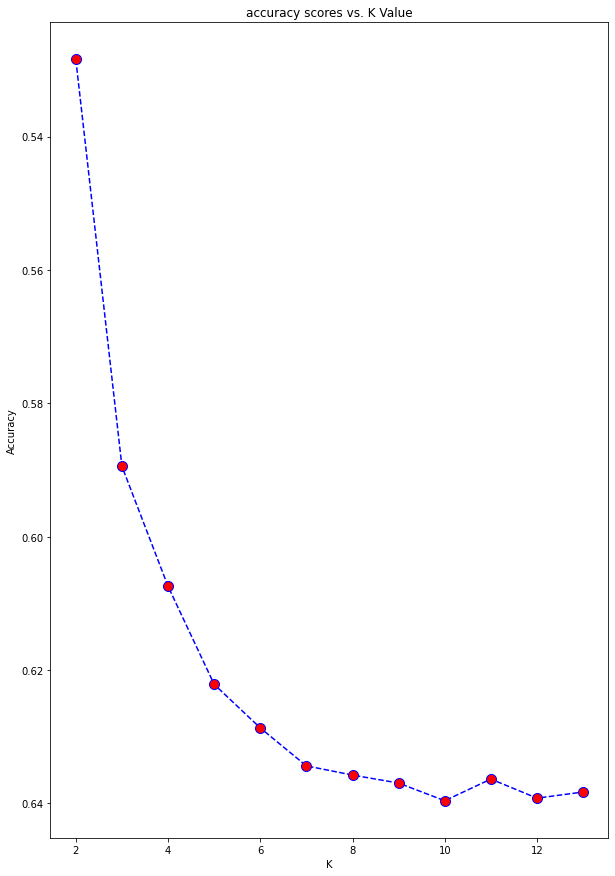

In [113]:
#using the elbow-method:

plt.figure(figsize=(10,15))
plt.plot(range(2,14),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')

In [130]:
#k=10 seems to be the best, but we could choose k=7 and it won't make too much of a difference in the end, trying with 12

KNN = KNeighborsRegressor(n_neighbors=10)
KNN.fit(X_train, y_train)

score1 = KNN.score(X_test, y_test)
score1

KNeighborsRegressor(n_neighbors=10)

0.6395873350339993

2. Try a simple linear regression with all the data to see whether we are getting good results.

In [131]:
from sklearn import linear_model

LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [132]:
score = LR.score(X_test, y_test)
score

0.7499827630808593

Whoa! LR is much better

In [134]:
from sklearn.metrics import r2_score
y_pred= LR.predict(X_test)
r2_score(y_pred, y_test) #okay r2_score is not that high

0.6792939115896406

3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [168]:
#lm = ['LinearRegression(),LinearRegressor,KNeihborsRegressor']
def func_train_test(model): #lm= list of models
    if model == 'LinearRegression':
        LR = LR = linear_model.LinearRegression()
        LR.fit(X_train,y_train)
        score = LR.score(X_test, y_test)
        y_pred= LR.predict(X_test)
        return print('R2 score of LR model is: ',r2_score(y_pred, y_test),'& score is: ',score)
    elif model == 'KNeighborsRegressor':
        KNN = KNeighborsRegressor(n_neighbors=10)
        KNN.fit(X_train, y_train)
        score = KNN.score(X_test, y_test)
        return print('KNeighborscore is: ',score)
    elif model == 'MLPRegressor':
        regr = MLPRegressor(random_state=25, max_iter=500).fit(X_train, y_train)
        regr.predict(X_test)
        MLPscore = regr.score(X_test, y_test)
        return print('MLPscore is: ',MLPscore)
    else:
        return print('no model applicable')
        
        
        
    
    

In [169]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression


In [170]:
#func_train_test(KNeighborsRegressor)

4. Use the function to check LinearRegressor and KNeighborsRegressor.

In [171]:
func_train_test('LinearRegression')

R2 score of LR model is:  0.6792939115896406 & score is:  0.7499827630808593


In [172]:
func_train_test('KNeighborsRegressor')

KNeighborscore is:  0.6395873350339993


5. You can check also the MLPRegressor for this task!

In [173]:
func_train_test('MLPRegressor')

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPscore is:  0.8368616354015195


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


7. Check and discuss the results.

In [175]:
func_train_test('LinearRegression')
print("-----")
func_train_test('KNeighborsRegressor')
print("-----")
func_train_test('MLPRegressor')

R2 score of LR model is:  0.6792939115896406 & score is:  0.7499827630808593
-----
KNeighborscore is:  0.6395873350339993
-----


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPscore is:  0.8368616354015195


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor has the highest score of .83, while LinearRegression and KNeighborscore is .67 and .63. There is a considerable improvement when we used MLPRegressor. It could be because MLPRegressor optimizes the squared-loss through ADAM as default solver.
